In [1]:
# Import all the necessary files!
import os
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd
from keras.datasets import cifar10

In [2]:
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()
training_images = training_images.reshape(50000, 1024, 3)
print(training_images[1].shape)
print(training_labels[1])

170500096/170498071 [==============================] - 6s 0us/step
(1024, 3)
[9]


In [3]:
#Reshaping and Normalizing training and test images
training_images = training_images.reshape(50000, 1024, 3)
training_images = training_images/255.0
test_images = test_images.reshape(10000, 1024, 3)
test_images = test_images/255.0

In [4]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, input_shape=(1024, 3), return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
        ])

In [12]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=["acc"])
history = model.fit(training_images, training_labels, batch_size = 50, epochs=50)

Epoch 1/50
1000/1000 [==============================] - 122s 122ms/step - loss: 1.8902 - acc: 0.3156
Epoch 2/50
1000/1000 [==============================] - 120s 120ms/step - loss: 1.8836 - acc: 0.3209
Epoch 3/50
1000/1000 [==============================] - 118s 118ms/step - loss: 1.8742 - acc: 0.3192
Epoch 4/50
1000/1000 [==============================] - 116s 116ms/step - loss: 1.8467 - acc: 0.3314
Epoch 5/50
1000/1000 [==============================] - 116s 116ms/step - loss: 1.8363 - acc: 0.3315
Epoch 6/50
1000/1000 [==============================] - 115s 115ms/step - loss: 1.8415 - acc: 0.3329
Epoch 7/50
1000/1000 [==============================] - 115s 115ms/step - loss: 1.8368 - acc: 0.3349
Epoch 8/50
1000/1000 [==============================] - 120s 120ms/step - loss: 1.8044 - acc: 0.3457
Epoch 9/50
1000/1000 [==============================] - 116s 116ms/step - loss: 1.7553 - acc: 0.3670
Epoch 10/50
1000/1000 [==============================] - 116s 116ms/step - loss: 1.7233 - a

In [13]:
_, acc = model.evaluate(test_images, test_labels, verbose=0)
print('> %.3f' % (acc * 100.0))

> 63.020


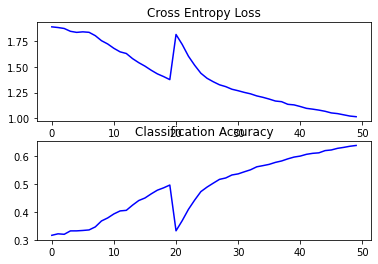

In [14]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')

pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')